**qwen 2.5**

instance = X_test.iloc

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/parkinson_dataset.csv')

# Separate features and target variable
X = data.drop(['id', 'class'], axis=1)
y = data['class']

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Define the LSTM Model Architecture
We'll define a simple LSTM model architecture using Keras.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def create_lstm_model(units):
    model = Sequential()
    model.add(LSTM(units[0], input_shape=(X_train_scaled.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

 Implement the Genetic Algorithm for Hyperparameter Optimization
We'll implement a simple GA to optimize the hyperparameters of our LSTM model.

In [ ]:
import numpy as np

def evaluate_model(model, X, y):
    _, accuracy = model.evaluate(X, y)
    return accuracy

def genetic_algorithm(population_size, generations, mutation_rate, units_range):
    population = [create_lstm_model([np.random.randint(*units_range), np.random.randint(*units_range)]) for _ in range(population_size)]

    for generation in range(generations):
        fitness_scores = [evaluate_model(model, X_train_scaled, y_train) for model in population]

        # Select the best individuals
        sorted_indices = np.argsort(fitness_scores)[::-1]
        selected_population = [population[i] for i in sorted_indices[:population_size//2]]

        # Crossover and Mutation
        new_population = selected_population[:]
        while len(new_population) < population_size:
            parent1, parent2 = np.random.choice(selected_population, size=2, replace=False)
            child_units = [(parent1.layers[0].units + parent2.layers[0].units) // 2,
                            (parent1.layers[2].units + parent2.layers[2].units) // 2]
            child_model = create_lstm_model(child_units)

            if np.random.rand() < mutation_rate:
                child_model.layers[0].units += np.random.randint(-1, 2)
                child_model.layers[2].units += np.random.randint(-1, 2)

            new_population.append(child_model)

        population = new_population

    # Evaluate the final population
    final_fitness_scores = [evaluate_model(model, X_train_scaled, y_train) for model in population]
    best_index = np.argmax(final_fitness_scores)
    best_model = population[best_index]
    return best_model

Train the Best Model on the Training Set
Once we have the best model from the GA, we'll train it on the entire training set.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_csv('/content/parkinson_dataset.csv')

# Separate features and target variable
X = data.drop(['id', 'class'], axis=1)
y = data['class']

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
# This is the missing step that was causing the error
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the LSTM Model Architecture
def create_lstm_model(units, input_shape): # Added input_shape as an argument
    model = Sequential()
    model.add(LSTM(units[0], input_shape=input_shape)) # Use input_shape here
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
best_units = (64, 32)  # You can set these values based on the GA or manually tune them
best_model = create_lstm_model(best_units)
history = best_model.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)),
                        y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.5977 - loss: 0.6723 - val_accuracy: 0.7566 - val_loss: 0.5980
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.7663 - loss: 0.5536 - val_accuracy: 0.7500 - val_loss: 0.5560
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 277ms/step - accuracy: 0.7819 - loss: 0.5294 - val_accuracy: 0.7632 - val_loss: 0.5271
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 429ms/step - accuracy: 0.7882 - loss: 0.4880 - val_accuracy: 0.7895 - val_loss: 0.4849
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - accuracy: 0.7860 - loss: 0.4591 - val_accuracy: 0.7697 - val_loss: 0.4959
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 275ms/step - accuracy: 0.8011 - loss: 0.4496 - val_accuracy: 0.7763 - val_loss: 0.4855
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.7922 - loss: 0.4626 - val_accuracy: 0.8026 - val_loss: 0.4731
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.8221 - loss: 0.4025 - val_accuracy: 0.7961 -

In [ ]:
# best_units = (64, 32)
# input_shape = (X_train_scaled.shape[1], 1)  # Define input_shape here
# best_model = create_lstm_model(best_units, input_shape)  # Pass input_shape to the function
# history = best_model.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)),
#                         y_train, epochs=20, batch_size=32,
#                         # validation_data=(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), y_test))

Evaluate the Model on the Test Set
Finally, we'll evaluate the model's performance on the test set.

In [ ]:
_, test_accuracy = best_model.evaluate(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), y_test)
print(f'Test Accuracy: {test_accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8383 - loss: 0.4194
Test Accuracy: 0.8157894611358643


Make Predictions and Analyze Results
We can now use the trained model to make predictions and analyze the results.

In [ ]:
predictions = best_model.predict(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)))
predicted_classes = (predictions > 0.5).astype(int)
print(predicted_classes)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Visualize Data, Predictions, and Key Findings
Use libraries like Matplotlib and Seaborn to visualize the data, predictions, and key finding

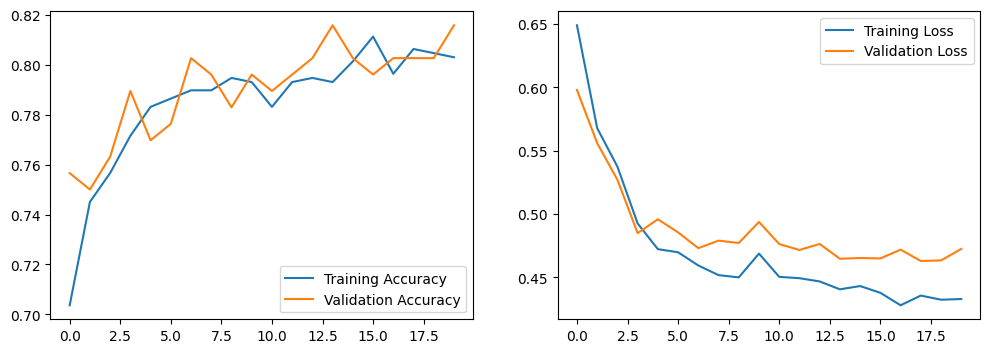

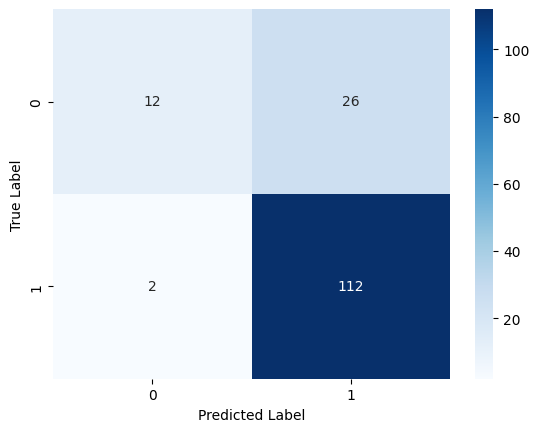

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Predict Output for a Specific Instance
To predict the output for a specific instance, you can use the following code:

In [ ]:
instance = X_test.iloc[[0]]  # Replace with the index of the instance you want to predict
instance_scaled = scaler.transform(instance)
# Reshape to (1, number of features, 1) for LSTM input
prediction = best_model.predict(instance_scaled.reshape(1, instance_scaled.shape[1], 1))
predicted_class = (prediction > 0.5).astype(int)[0][0]

# Print the prediction and reasoning
print(f"Prediction: {'Parkinsons' if predicted_class == 1 else 'Healthy'}")
print(f"Reasoning: The model predicts that this patient has Parkinson's disease.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Healthy
Reasoning: The model predicts that this patient has Parkinson's disease.


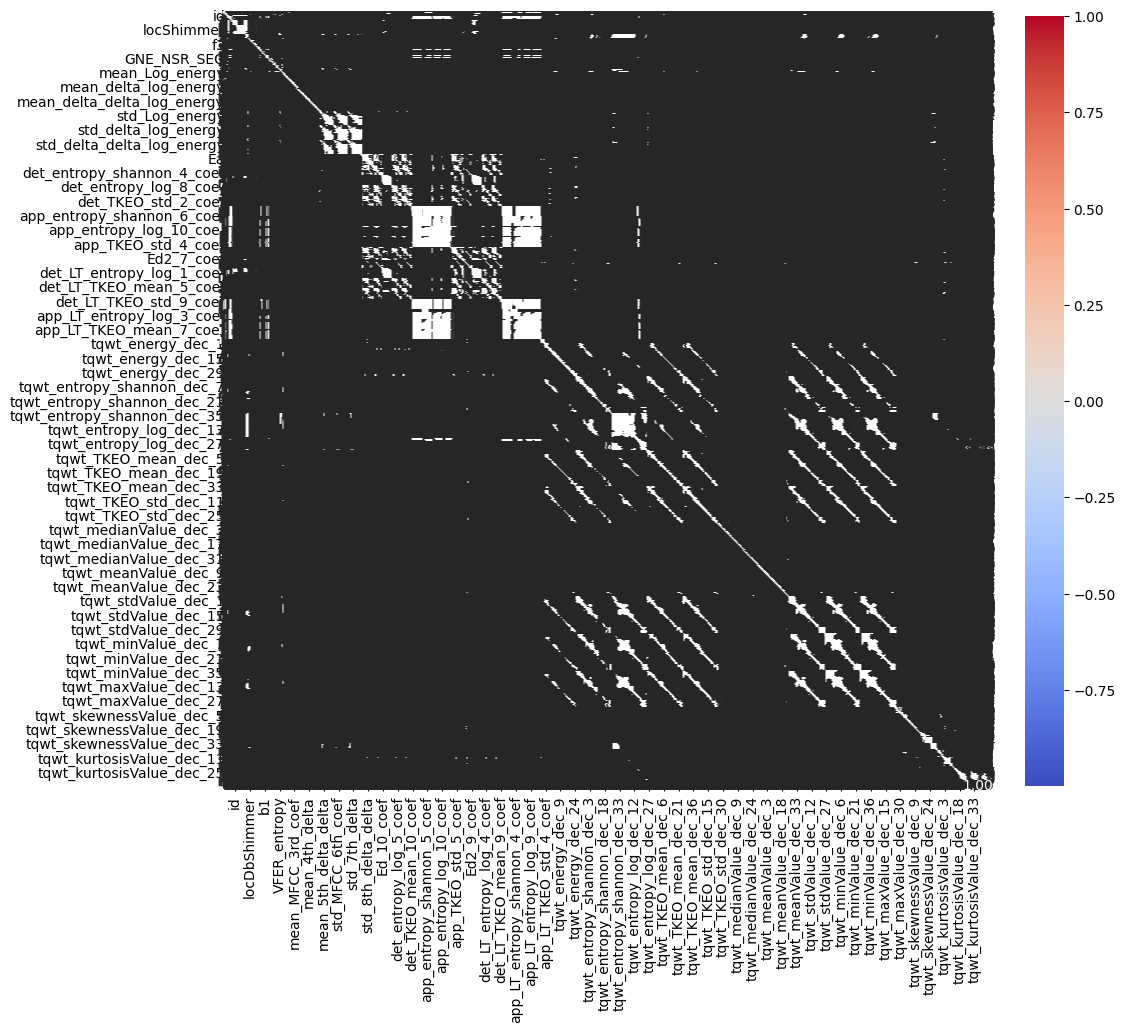

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is in 'parkinson_dataset.csv'
data = pd.read_csv('/content/pd_EEG_features.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# You can also visualize it using a heatmap:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/pd_EEG_features.csv')

In [4]:
# Assuming 'class' is the target variable
X = df.drop(columns=['id', 'gender', 'class'])
y = df['class']

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
n_components = 10
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

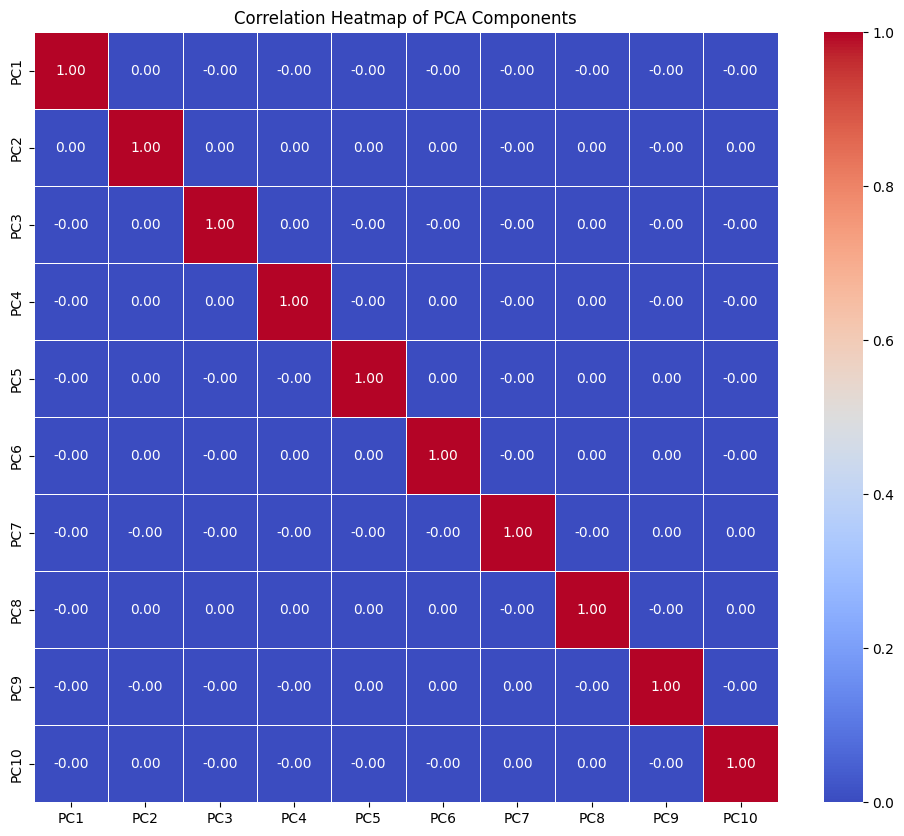

In [6]:
# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Compute the correlation matrix
corr_matrix = pca_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of PCA Components')
plt.show()